<img style="float: left;" src="rflogo.png" width="250">

# Clustering



### Notebook by [Marco Tavora](https://marcotavora.me/)

<br>
<img align="left" width="60" height="200" src="https://img.shields.io/badge/R-v3.5.0-green.svg">
<br>


## Table of contents

1. [Introduction](#Introduction)

## Introduction
[[go back to the top]](#Table-of-contents)

Using clustering algorithms we can understand how a sample might be comprised of different subgroups. In the present case, the data to be clustered includes both categorical and continuous data and standard distance measures such as Euclidean cannot be used. In the following we will use Gower distances to measure dissimilarity. 

In clustering applications one must:
- Choose a measure of distance
- Choose a clustering algorithm
- Selecting the number of clusters

For illustration, the publicly available “College” dataset found in the ISLR package will be used, which has various statistics of US Colleges from 1995 (N = 777). To highlight the challenge of handling mixed data types, variables that are both categorical and continuous will be used and are listed below:

Continuous
Acceptance rate
Out of school tuition
Number of new students enrolled
Categorical
Whether a college is public/private
Whether a college is elite, defined as having more than 50% of new students who graduated in the top 10% of their high school class
The code was run using R version 3.2.2 with the following packages:

## Data
[[go back to the top]](#Table-of-contents)

In [67]:
loja <- read.csv('loja_wo_dummies.csv')
head(loja)

loja,piso,corredor,tipo_de_loja,loja_esquerda,loja_direita,loja_em_frente,area_m2,vitrine_m,esquina,ocupante,segmento,tipo_de_segmento
1,1,1,Satélite,Entrada 01 Esquerda,3,106,294,12.4,Não,Ótica São Pedro,Ótica,Impulso
3,1,1,Satélite,1,11,105,40,6.0,Não,CVC,Agência Turismo,Serviço
4,1,1,Satélite,11,5,101,40,6.0,Não,Chili Beans,Ótica,Impulso
5,1,1,Satélite,4,6,100,38,6.0,Não,Vivo,Eletrônicos,Impulso
6,1,1,Satélite,5,7,100,38,6.0,Não,Samsung,Eletrônicos,Impulso
9,1,1,Satélite,7,10,ANC3,34,6.0,Não,Gang,Vestuário,Impulso


In [101]:
head(loja)

loja,piso,corredor,tipo_de_loja,loja_esquerda,loja_direita,loja_em_frente,area_m2,vitrine_m,esquina,ocupante,segmento,tipo_de_segmento
1,1,1,Satélite,Entrada 01 Esquerda,3,106,294,12.4,Não,Ótica São Pedro,Ótica,Impulso
3,1,1,Satélite,1,11,105,40,6.0,Não,CVC,Agência Turismo,Serviço
4,1,1,Satélite,11,5,101,40,6.0,Não,Chili Beans,Ótica,Impulso
5,1,1,Satélite,4,6,100,38,6.0,Não,Vivo,Eletrônicos,Impulso
6,1,1,Satélite,5,7,100,38,6.0,Não,Samsung,Eletrônicos,Impulso
9,1,1,Satélite,7,10,ANC3,34,6.0,Não,Gang,Vestuário,Impulso


We will use the following packages:
- `dplyr` for data cleaning
- `cluster` for gower similarity and pam
- `Rtsne`  for t-SNE plot
- `ggplot2` for visualization

In [44]:
set.seed(1680) 
library(dplyr) 
library(cluster)
library(Rtsne) 
library(ggplot2) 

## Gower distance
[[go back to the top]](#Table-of-contents)

In [68]:
df_loja <- cbind(loja)
head(df_loja)

loja,piso,corredor,tipo_de_loja,loja_esquerda,loja_direita,loja_em_frente,area_m2,vitrine_m,esquina,ocupante,segmento,tipo_de_segmento
1,1,1,Satélite,Entrada 01 Esquerda,3,106,294,12.4,Não,Ótica São Pedro,Ótica,Impulso
3,1,1,Satélite,1,11,105,40,6.0,Não,CVC,Agência Turismo,Serviço
4,1,1,Satélite,11,5,101,40,6.0,Não,Chili Beans,Ótica,Impulso
5,1,1,Satélite,4,6,100,38,6.0,Não,Vivo,Eletrônicos,Impulso
6,1,1,Satélite,5,7,100,38,6.0,Não,Samsung,Eletrônicos,Impulso
9,1,1,Satélite,7,10,ANC3,34,6.0,Não,Gang,Vestuário,Impulso


In [72]:
df_loja$loja <- NULL
df_loja$piso <- NULL

head(df_loja)

corredor,tipo_de_loja,loja_esquerda,loja_direita,loja_em_frente,area_m2,vitrine_m,esquina,ocupante,segmento,tipo_de_segmento
1,Satélite,Entrada 01 Esquerda,3,106,294,12.4,Não,Ótica São Pedro,Ótica,Impulso
1,Satélite,1,11,105,40,6.0,Não,CVC,Agência Turismo,Serviço
1,Satélite,11,5,101,40,6.0,Não,Chili Beans,Ótica,Impulso
1,Satélite,4,6,100,38,6.0,Não,Vivo,Eletrônicos,Impulso
1,Satélite,5,7,100,38,6.0,Não,Samsung,Eletrônicos,Impulso
1,Satélite,7,10,ANC3,34,6.0,Não,Gang,Vestuário,Impulso


In [47]:
library(gpairs)
library(corrplot)
library(gplots)
library(car)

In [75]:
lambda_area_m2 <- coef(powerTransform(df_loja$area_m2))
lambda_vitrine_m <- coef(powerTransform(df_loja$vitrine_m))
lambda_area_m2
lambda_vitrine_m

df_loja$area_m2 
     -0.7917248

df_loja$vitrine_m 
       -0.7305509

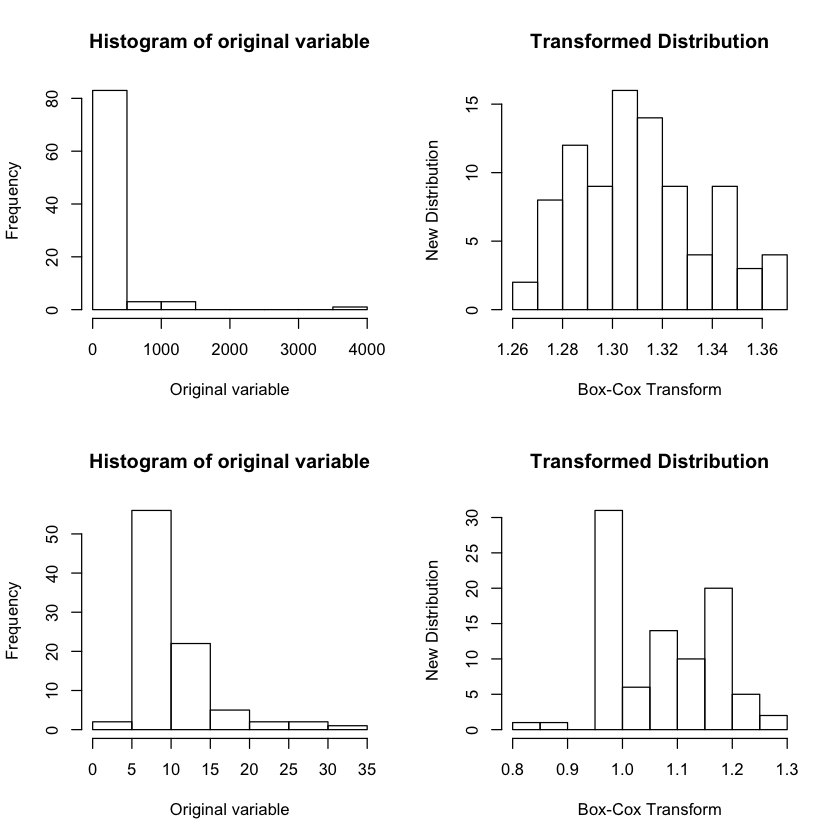

In [133]:
par(mfrow=c(2,2))
hist(df_loja$area_m2, xlab="Original variable", 
     main="Histogram of original variable")
hist(bcPower(df_loja$area_m2, lambda_vitrine_m),
     xlab="Box-Cox Transform", ylab="New Distribution", 
     main="Transformed Distribution")
hist(df_loja$vitrine_m, xlab="Original variable", 
     main="Histogram of original variable")
hist(bcPower(df_loja$vitrine_m, lambda_vitrine_m),
     xlab="Box-Cox Transform", ylab="New Distribution", 
     main="Transformed Distribution")

In [78]:
library(cluster) 
gower.dist <- daisy(df_loja, metric = c("gower"))

In [80]:
summary(gower_dist)

4005 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01356 0.03195 0.03768 0.03631 0.04124 0.04928 
Metric :  mixed ;  Types = I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, 

## Choosing a clustering algorithm

In [82]:
sil_width <- c(NA)

In [ ]:
for(i in 2:10){
  
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}

In [84]:
pam_fit

Medoids:
      ID   
 [1,] 67 67
 [2,]  5  5
 [3,] 11 11
 [4,] 46 46
 [5,] 21 21
 [6,] 26 26
 [7,] 79 79
 [8,] 64 64
 [9,] 84 84
[10,] 89 89
Clustering vector:
 [1]  1  1  1  2  2  3  3  1  4  3  3  2  1  1  2  5  5  5  5  5  5  1  5  5  5
[26]  6  5  6  5  6  5  6  6  5  5  5  5  6  5  5  5  6  6  5  4  4  7  2  8  8
[51]  8  8  8  8  8  3  1  3  3  8  8  8  8  8  1  1  1  1  8  8  8  8  3  3  7
[76]  6  7  7  7  7  7  7  7  9  9  9 10 10 10  7
Objective function:
     build       swap 
0.02198895 0.02198895 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

### Plot sihouette width (higher is better)

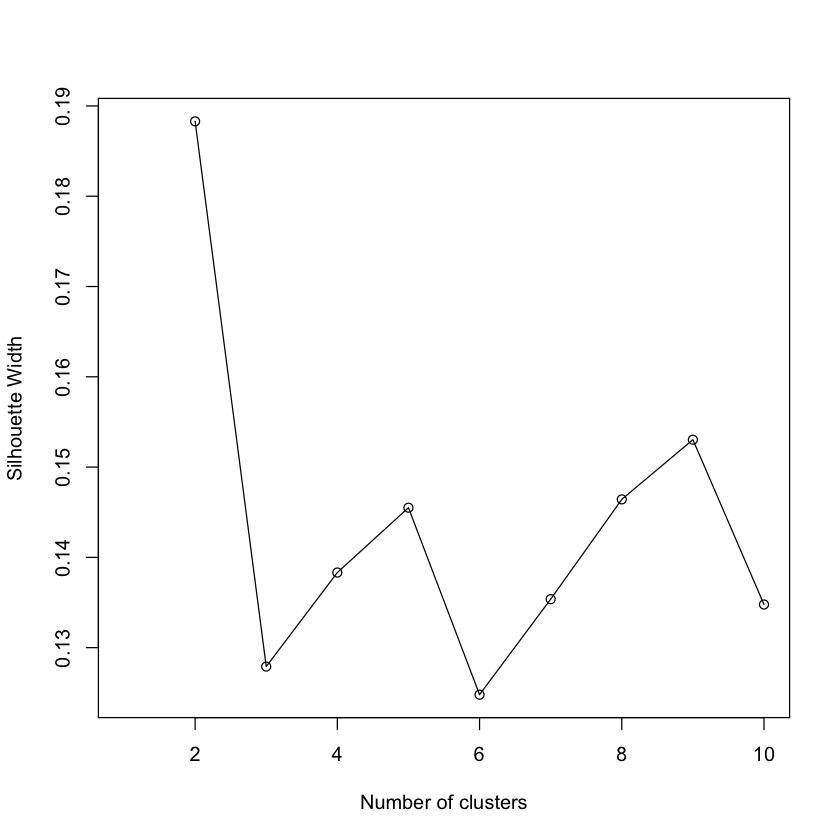

In [132]:
par(mfrow=c(1,1))
plot(1:10, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_width)

center
Cluster Interpretation
Via Descriptive Statistics
After running the algorithm and selecting three clusters, we can interpret the clusters by running summary on each cluster. Based on these results, it seems as though Cluster 1 is mainly Private/Not Elite with medium levels of out of state tuition and smaller levels of enrollment. Cluster 2, on the other hand, is mainly Private/Elite with lower levels of acceptance rates, high levels of out of state tuition, and high graduation rates. Finally, cluster 3 is mainly Public/Not Elite with the lowest levels of tuition, largest levels of enrollment, and lowest graduation rate.

In [90]:
pam_fit <- pam(gower_dist, diss = TRUE, k = 3)

In [93]:
pam_results <- df_loja %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))

In [94]:
pam_results$the_summary

[[1]]
    corredor          tipo_de_loja loja_esquerda  loja_direita
 Min.   :1.000   Satélite   :24    1      : 1    10     : 1   
 1st Qu.:1.000   Satélite   : 7    10     : 1    101    : 1   
 Median :1.000   Alimentação: 1    101    : 1    105    : 1   
 Mean   :1.061   Serviços   : 1    104    : 1    106    : 1   
 3rd Qu.:1.000   Âncora     : 0    107    : 1    108    : 1   
 Max.   :3.000   Restaurante: 0    108    : 1    11     : 1   
                 (Other)    : 0    (Other):27    (Other):27   
     loja_em_frente    area_m2         vitrine_m     esquina 
 100        : 2     Min.   : 34.00   Min.   : 3.67   Não:26  
 88         : 2     1st Qu.: 46.00   1st Qu.: 6.00   Sim: 7  
 96         : 2     Median : 61.00   Median : 6.00           
 ANC4       : 2     Mean   : 91.27   Mean   :10.02           
 10, 12 e 14: 1     3rd Qu.: 86.00   3rd Qu.:13.35           
 101        : 1     Max.   :335.00   Max.   :28.73           
 (Other)    :23                                         

In [95]:
df_loja[pam_fit$medoids, ]

,corredor,tipo_de_loja,loja_esquerda,loja_direita,loja_em_frente,area_m2,vitrine_m,esquina,ocupante,segmento,tipo_de_segmento
67,1,Satélite,86,88,17,61,6.00,Não,Daniele Dessin,Acessórios Femininos,Impulso
21,2,Satélite,26,SA4,34,90,8.44,Não,Jóias Rochedo,Acessórios Femininos,Impulso
64,3,Alimentação,91,2,"28, 70 e QF2",48,14.09,Sim,Batata Inglesa,Alimentação,Destino


In [ ]:
df_clusters <- cbind(df_loja)
df_clusters$cluster <- factor(pam_fit$clustering)

In [115]:
df_clusters[,c]

corredor,tipo_de_loja,loja_esquerda,loja_direita,loja_em_frente,area_m2,vitrine_m,esquina,ocupante,segmento,tipo_de_segmento,loja,cluster
1,Satélite,Entrada 01 Esquerda,3,106,294,12.40,Não,Ótica São Pedro,Ótica,Impulso,1,1
1,Satélite,1,11,105,40,6.00,Não,CVC,Agência Turismo,Serviço,3,1
1,Satélite,11,5,101,40,6.00,Não,Chili Beans,Ótica,Impulso,4,1
1,Satélite,4,6,100,38,6.00,Não,Vivo,Eletrônicos,Impulso,5,1
1,Satélite,5,7,100,38,6.00,Não,Samsung,Eletrônicos,Impulso,6,1
1,Satélite,7,10,ANC3,34,6.00,Não,Gang,Vestuário,Impulso,9,1
1,Satélite,9,12,ANC4,212,11.60,Não,Ortobom,Colchoes,Impulso,10,1
1,Satélite,3,4,104,40,6.00,Não,Realce Bijuterias,Acessórios Femininos,Impulso,11,1
1,Serviços,10,13,96,109,7.65,Não,Caixas Eletrônicos,Banco,Serviço,12,1
1,Satélite,12,14,96,86,8.00,Não,Rio Sports,Vestuário,Impulso,13,1


In [111]:
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE, perplexity = 28)

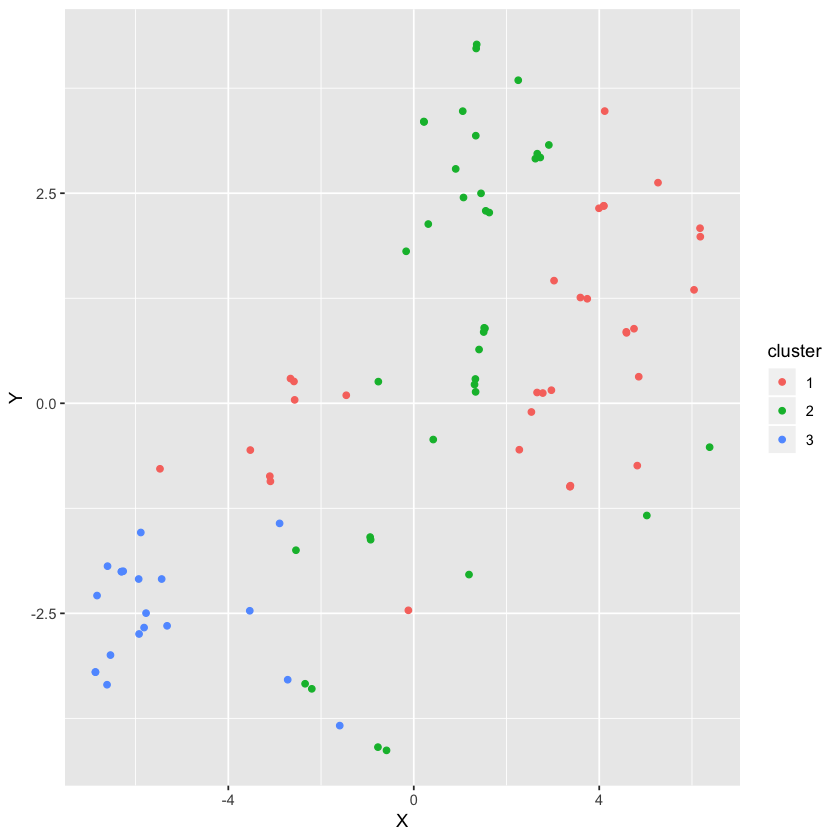

In [112]:
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering),
         name = loja$loja)

ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))